In [1]:
import os
import pathlib
import pprint
import sys


import matplotlib.pyplot as plt
import numpy as np
from spdm.logger import logger
from spdm.data.File import File
from spdm.data.Mapping import Mapping


In [8]:
mapping = Mapping(mapping_path="/home/salmon/workspace/fytok_data/mapping")

# entry = mapping.find("EAST")

entry = mapping.map(File("/home/salmon/workspace/data/efit_east?tree_name=efit_east,shot=38300",
                               format="mdsplus").read(), source_schema="EAST")

logger.debug(entry.get("wall.description_2d.vessel.annular.outline_outer.r"))

logger.debug(entry.get("wall.description_2d.vessel.annular.outline_outer.z"))

plt.gca().add_patch(plt.Polygon(np.array([entry.get("wall.description_2d.vessel.annular.outline_outer.r"),
                                            entry.get("wall.description_2d.vessel.annular.outline_outer.z")]).transpose([1, 0]),
                                fill=False, closed=True))

for coil in entry.get("pf_active.coil"):
    rect = coil.get(["element", 0, "geometry","rectangle"]).dump_named()
    plt.gca().add_patch(plt.Rectangle((rect.r-rect.width/2.0, rect.z -
                                        rect.height/2.0), rect.width, rect.height, fill=False))
plt.axis('scaled')

2022-11-10 12:14:39,180 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open MDSplusFile: /home/salmon/workspace/data/efit_east mode='r'
2022-11-10 12:14:39,185 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open XMLFile: [PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/static/config.xml'), PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/dynamic/config.xml')] mode='r'


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

2022-11-10 12:10:05,121 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open MDSplusFile: /home/salmon/workspace/data/efit_east mode='r'
2022-11-10 12:10:05,124 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:65:__init__: Open XMLFile: [PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/static/config.xml'), PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/dynamic/config.xml')] mode='r'


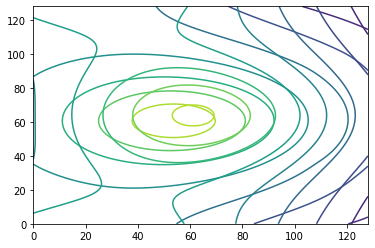

In [4]:


plt.contour(entry.get(["equilibrium", "time_slice", 0, "profiles_2d", "psi"]).T)
plt.contour(entry.get(["equilibrium", "time_slice", 10, "profiles_2d", "psi"]).T)


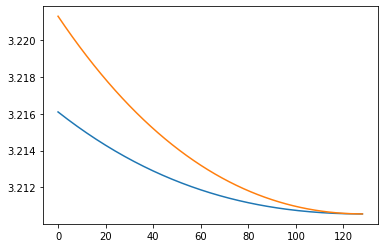

In [7]:
plt.plot(entry.get(["equilibrium", "time_slice", 0, "profiles_1d", "f"]))
plt.plot(entry.get(["equilibrium", "time_slice", 10, "profiles_1d", "f"]))